# **Lecture 9. Support Vector Machines**
## **Applied Machine Learning**

## **Part 1: Classification Margins**

In this lecture, we are going to cover Support Vector Machines (SVMs), one of the most successful classification algorithms in machine learning.

We start the preresentation of SVMs by defining the classification Margins.

### **Review: Binary Classification**
Consider a training set $\mathcal{D}$.

We distinguish between two types of supervised learning problems by the target variables $y^{(i)}$

* Regression: The target variables $y \in \mathcal{Y}$ is continuous: $\mathcal{Y} \in \mathbb{R}$.
* Binary classification: Tha target variable $y \in \mathcal{Y}$ is discrete and takes on one of 2 value $\mathcal{Y} = \{-1,+1\}$

### **Review: Linear Model Family**
In this lecture, we will work with linear model family of the form:
$$f_{\theta}(x) = \theta_0 + \theta_1x_1 + \dots + \theta_dx_d$$

where $x \in \mathbb{R}^d$ is a vector of features and $y = \{-1, +1\}$ is the target. The $\theta_j$ are the parameters of the model.

We can preresent the model in the vectorized form:
$$f_{\theta}(x) = \theta_0 + \theta^\top \cdot x.$$

### **Notation and the Iris Dataset**

In this lecture, we are going again Iris dataset.

As we just mentioned, we make two additional assumptions
* We will only consider binary classification
* We will use $\mathcal{Y} = \{-1,1\} $ as the label space

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets

# Loaad the Iris dataset
iris = datasets.load_iris(as_frame=True)
iris_X, iris_y = iris.data, iris.target

# subsample to a third of the data points
iris_X = iris_X.iloc[::4]
iris_y = iris_y.iloc[::4]

# Create a binary classification dataset with label +/-1
iris_y2 = iris_y.copy()
iris_y2[iris_y2==2] = 1
iris_y2[iris_y2==0] = -1

# Print part of the dataset
pd.concat([iris_X, iris_y2], axis=1).head()
pd.concat([iris_X, iris_y2], axis=1).tail()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] =(12,4)
import warnings
warnings.filterwarnings('ignore')

# Create 2d version of dataset and subsample it
X = iris_X.to_numpy()[:,:2]
x_min, x_max = X[:,0].min() -.5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

# Plot also the training points
p1 = plt.scatter(X[:,0], X[:,1], c=iris_y, edgecolor='k', s=40, cmap=plt.cm.Paired)
plt.xlabel('SEpal length')
plt.ylabel('Sepal width')
plt.legend(handles=p1.legend_elements()[0], labels=('Setosa', 'Not Setosa'), loc='lower right')

### **Comparing Classification Algorithms**

We have different types approaches to classification.

When fitting a model, there may be many valid decision boundaries. How do we select one?

Consider the following three classification algorithms from `sklearn`. Each of them outputs a different classification boundary.

In [ ]:
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier
models = [LogisticRegression(), Perceptron(), RidgeClassifier()]

def fit_and_create_boundary(model):
  model.fit(X, iris_y2)
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  return Z

plt.figure(figsize=(12,3))
a = 1
b = 3

for i, model in enumerate(models):
  plt.subplot(a,b,i+1)
  Z = fit_and_create_boundary(model)
  plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

  #Plot also the training points
  plt.scatter(X[:,0], X[:,1], c=iris_y2, s=40, edgecolor='k', cmap=plt.cm.Paired)
  plt.title("Algorithm %d" % (i+1))
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')



### **Classification Scores**

Most classification algorithms output not just a class label but a score.
* For example, logistic regression returns the class probability
$$p(y=1\|x) = \sigma(\theta^\top x) \in [0,1]$$

If the class probability is $> 0.5$, the model output class $1$. 

The score is an estimate of confidence; it also preresents how far we are from the decision boundary.

### **The Max-Margin Principle**

Intuitively, we want to select boundaries with *high margin*.

This means that we are as confident as possible for every point and as far as possible from the decision boundary.

Several of the separating boundaries in our previous example had low margin: they came too close to the boundary.

In [ ]:
from sklearn.linear_model import Perceptron, RidgeClassifier
from sklearn.svm import SVC
models = [SVC(kernel='linear', C=10000), Perceptron(), RidgeClassifier()]

def fit_and_create_boundary(model):
  model.fit(X, iris_y2)
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  return Z

plt.figure(figsize=(12,3))
a=1
b=3

for i, model in enumerate(models):
  plt.subplot(a,b,i+1)
  Z = fit_and_create_boundary(model)
  plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

  # Plot also the training points
  plt.scatter(X[:,0], X[:,1], c=iris_y2, s=40, edgecolor='k', cmap=plt.cm.Paired)
  if i==0:
    plt.title('Good Margin')
  else:
    plt.title('Bad margin')
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')

plt.show()

Below we plot a decision boundary between the two classes (solid line) that has a high margin. The two dashed lines that lie at the margin.

Points that are the margin are highlighted in black. A good decision boundary is as far away as possible from the points at the margin.

In [ ]:
from sklearn import svm

# Fit the model, don't regularize for illustration purposes.
clf = svm.SVC(kernel='linear', C=1000) 
clf.fit(X, iris_y2)

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=iris_y2, edgecolor='k', s=30, cmap=plt.cm.Paired)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# plot decision boundary and margins
plt.contour(xx,yy,Z,colors='k',levels=[-1,0,1], alpha=0.5,
            linestyle=['--','-','--'])
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
plt.xlim([4.6,6])
plt.ylim([2.25,4])

### **The Functional Classification Margin**

How can we define the concept of margin more formally?

We can try to define the margin $\tilde \gamma^{(i)}$ with respect to a training example $(x^{(i)},y^{(i)})$ as
$$\tilde \gamma^{(i)} = y^{(i)} \cdot f(x^{(i)}) = y^{(i)} (\theta^\top x^{(i)} + \theta_0). $$

We call this *functional* margin. Let's analyze it

We defined the functional margin as:
$$\tilde \gamma^{(i)} = y^{(i)} \cdot (\theta^\top x^{(i)} + \theta_0).$$
* If $y^{(i)}=1$, then the margin $\tilde \gamma^{(i)}$ is large if the model score $f(x^{(i)}) = \theta^\top x^{(i)} + \theta_0 $ is positive and large.
* Thus, we are classifying $x^{(i)}$ correctly and with high confidence.
*  If $y^{(i)}=-1$, then the margin $\tilde \gamma^{(i)}$ is large if is negative and large in absolute value.
* We are again classifying $x^{(i)}$ correctly and with high confidence.

Thus higher margin mean higher confidence at each input point.

However, we have a problem
* If we rescale the parameters $\theta, \theta_0$ by a scalar $\alpha > 0$, we get new parameter $\alpha \theta, \alpha \theta_0$.
* The  $\alpha \theta, \alpha \theta_0$ doesn't change the classification of points. 
* However, the margin $(\alpha\theta^\top x^{(i)} +\alpha\theta_0) = \alpha(\theta^\top x^{(i)} + \theta_0)$ is now scaled by $\alpha$!

It doesn't make sense that the same classification boundary can have different margins when we rescale it.

### **The Geometric Classification Margin**

We define the margin $\tilde \gamma^{(i)}$ with respect to an example training $(x^{(i)}, y^{(i)})$ as
$$\tilde \gamma^{(i)} = y^{(i)}\left(\frac{\theta^\top x^{(i)} + \theta_0}{\|\theta\|}\right)$$

* We normalize the functional margin by $\|\theta\|$
* Rescaling the weights can no longer make the margin arbitrarily large, which addresses our previous issue. 




### **Geometric Intuitions**

The margin $\tilde \gamma^{(i)}$ is called geometric because it corresponds to a distance from the $x^{(i)}$ to the separating hyperplane $\theta^\top x + \theta_0 = 0$ (dashed line below)

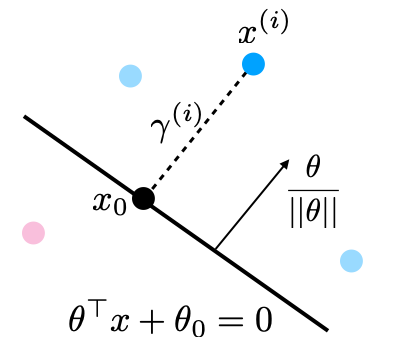

Suppose that $y^{(i)} = 1$ ($x^{(i)}$ lies on the positive side of boundary). Then:
1. The point $x$ which lie on the decision boundary are those for which $\theta^\top x + \theta_0 = 0$ (score is precisely $0$ and lie between $-1$ and $1$)
2. The vector $\frac{\theta}{\|\theta\|}$ is perpedicular to the hyperplane $\theta^\top x + \theta_0$ and has unit norm (fact from calculus),
3. Let $x_0$ is the point on the decision boundary closest to $x^{(i)}$. Then by the definition of the margin $x^{(i)} = x_0 + \tilde \gamma^{(i)}\frac{\theta}{\|\theta\|}$ or 
$$x_0 = x^{(i)} - \tilde \gamma^{(i)}\frac{\theta}{\|\theta\|}$$
4. Since $x_0$ is on the hyperplane, $\theta^\top x_0 + \theta_0 = 0$, or 
$$\theta^\top \left( x^{(i)} - \tilde \gamma^{(i)}\frac{\theta}{\|\theta\|}\right) + \theta_0 = 0$$

5. Solving for $\tilde \gamma^{(i)}$, and using the fact that $\theta^\top \theta = \theta^2$, we obtain;
$$\tilde \gamma^{(i)} = \frac{\theta^\top x^{(i)} + \theta_0}{\|\theta\|}$$

Which our geometric margin. The case of $y^{(i)}=-1$ can be proven in a similar way.

We can use our formula for $\psi^{(i)}$ to precisely plot the margin on our earlier plot

In [ ]:
# Plot the decision boundary
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=iris_y2, s=30, edgecolor='k', cmap=plt.cm.Paired)
plt.contour(xx,yy,Z,color='k', levels=[-1,0,1], alpha=0.15,
            linestyle=['--','-','--'])
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
plt.xlim([4.5,6])
plt.ylim([2.25,4])

# Plot the margin vector
theta = clf.coef_[0]
theta0 = clf.intercept_
for idx in clf.support_[:3]:
  x0 = X[idx]
  y0 = iris_y2.iloc[idx]
  margin_x0 = (theta.dot(x0) + theta0)[0] / np.linalg.norm(theta)
  w = theta/np.linalg.norm(theta)
  plt.plot([x0[0], x0[0]-w[0]*margin_x0],[x0[1], x0[1] - w[1]*margin_x0], color='blue')
  plt.scatter([x0[0]-w[0]*margin_x0], [x0[1] - w[1]*margin_x0], color='blue')
plt.show()


## **Part 2: The Max-Margin Classifier**

We have seen a way to measure the confidence level of a classifier at a data point using the notion of a *margin*.

Next, we are going to see how to maximize the margin of linear classifiers.

### **Review: Linear Model Family**
In this lecture, we consider classification with linear models of the form:
$$f_{\theta}(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \dots + \theta_dx_d.$$

where $x \in \mathbb{R}^d$ is a vector of features and $y \in \{-1,1\}$ is the target. The $\theta_j$ is the parameters of the model.

We can represent the model in vectorized form:

$$f_{\theta}(x) = \theta^\top x + \theta_0.$$

### **Review: Geometric Margin**
We define the *geometric* margin $\gamma^{(i)}$ with respect to a training example $(x^{(i)}, y^{(i)})$ as
$$\gamma^{(i)} = y^{(i)}\frac{\theta^\top x + \theta_0}{\|\theta\|}$$

This also corresponds to the distance from $x^{(i)}$ to the hyperplane.

### **Maximizing the Margin**

We want to define an objective that will result in maximizing the margin. As a first attempt, consider the following optimization problem.

\begin{align*}
\max_{\theta. \theta_0, \gamma} \gamma \; & \\
\text{subjected to} \; & y^{(i)}\frac{(x^{(i)})^\top\theta + \theta_0}{\|\theta\|} \geq \gamma \; \text{for all} \;  i
\end{align*}

This is maximies the smallest margin over the $(x^{(i)},y^{(i)})$. It gaurantees each point has margin at least $\gamma$

This problem is difficult to optimize because of the devision by $\|\theta\|$ and we would like to simplify it. First, consider the equivalent problem

\begin{align*}
\max_{\theta. \theta_0, \gamma} \gamma \; & \\
\text{subjected to} \; & y^{(i)}(x^{(i)})^\top\theta + \theta_0 \geq \|\theta\|\gamma \; \text{for all} \;  i
\end{align*}

Note that this problem has an extra degree of freedom:

* Suppose we multiply $\theta, \theta_0$ by some constant $c > 0$
* This yields another valid solution!

To enforce uniqueness, we add another constraint that doesn't change the minimizer

$$\|\theta\| = \frac{1}{\gamma}.$$

This ensures we cannot rescale $\theta$ and also takes our linear model to assign each $x^{(i)}$ a score of at least $\pm 1$

$$y^{(i)}(x^{(i)})^\top\theta + \theta_0 \geq 1 \; \text{for all} \;  i$$

If we constraint $\|\theta\| = \frac{1}{\gamma}$ holds, then we know that $\gamma = 1/\theta$ and we can replace $\gamma$ in the optimization problem to obtain:

\begin{align*}
\max_{\theta. \theta_0, \gamma} \frac{1}{\|\theta\|} \; & \\
\text{subjected to} \; & y^{(i)}(x^{(i)})^\top\theta + \theta_0 \geq 1 \; \text{for all} \;  i
\end{align*}

The solution of this problem is still the same.


**Final Version**

Instead of maximizing $1/\theta$, we can minimize $\theta$, or equivalently we can minimize $\frac{1}{2}\|\theta\|^2$

\begin{align*}
\min_{\theta. \theta_0, \gamma} \frac{1}{2}\|\theta\|^2 \; & \\
\text{subjected to} \; & y^{(i)}(x^{(i)})^\top\theta + \theta_0 \geq 1 \; \text{for all} \;  i
\end{align*}

This is now a quadratic program that can be solved using off-the-shelf optimization algorithms!

### **Algorithm: Linear Support Vector Machine Classification**

* **Type**: Supervised learning (binary classification)
* **Model Family**: Linear decision boundaries
* Objective Function: Max-margin optimization
* Optimizer: Quadratic optimization algorithms

## **Part 3: Soft Margins and the Hinge Loss**

Let's continue look at how can we maximize the margin.

### **Review: Maximizing the Margin**
We saw that maximizing the margin amounts to solving the following optimization problem:

\begin{align*}
\min_{\theta. \theta_0, \gamma} \frac{1}{2}\|\theta\|^2 \; & \\
\text{subjected to} \; & y^{(i)}(x^{(i)})^\top\theta + \theta_0 \geq 1 \; \text{for all} \;  i
\end{align*}



### **Non-Separable Problem**
So far, we have assume that a linear hyperplane exists. However, what if the classes are non-separable? Then our optimization problem does not have a solution and we need to modify it.

Our solution is going to be make each constraint "soft", by introducing "slack" variables, which allow the constraint to be violated.

$$y^{(i)}(x^{(i)})^\top\theta + \theta_0 \geq 1 - \xi_i.$$

* If we can classify each point with a perfect score of $\geq 1$, the $\xi_i = 0.$
* If we cannot assign a perfect score, we assign a score of $1 - \xi_i.$
* We define optimization such that the $\xi_i$ are chosen to be as small as possible.

In the optimization problem, we assign a penalty $C$ to these slack variables

\begin{align*}
\min_{\theta. \theta_0, \gamma} \frac{1}{2}\|\theta\|^2 + &C\sum_{i=1}^n\xi_i \;   \\
\text{subjected to} \; & y^{(i)}(x^{(i)})^\top\theta + \theta_0 \geq 1 \; \text{for all} \;  i \; & \\
\xi_i \geq 0
\end{align*}

### **Towards an Unconstrainted Objective**

Since $\xi_i = (1 - y^{(i)}((x^{(i)})^\top\theta + \theta_0))^+$, we can take 

\begin{align*}
\min_{\theta. \theta_0, \gamma} \frac{1}{2}\|\theta\|^2 + &C\sum_{i=1}^n\xi_i \;   \\
\text{subjected to} \; &\xi_i \geq 1 - y^{(i)}(x^{(i)})^\top\theta + \theta_0 \geq 0\; \text{for all} \;  i 
\end{align*}

And we turn it into the following by plugging in the definition of $\xi_i$

$$\min_{\theta, \theta_0} \frac{1}{2}\|\theta\|^2 + C\sum_{i=1}^n (1 - y^{(i)}((x^{(i)})^\top\theta + \theta_0))^+$$

Since it doesn't matter which term we multiply by $C > 0$, this is equivalent to:

$$\min_{\theta, \theta_0,\xi}\sum_{i=1}^n (1 - y^{(i)}((x^{(i)})^\top\theta + \theta_0))^+ + \frac{\lambda}{2}\|\theta\|^2 $$

for some $\lambda > 0$.

### **An Unconstrainted Objective**

We have now turned our optimization problem into an unconstrainted form:

$$\min_{\theta, \theta_0,\xi}\underbrace{\sum_{i=1}^n (1 - y^{(i)}((x^{(i)})^\top\theta + \theta_0))^+}_{\text{Hinge Loss}} + \underbrace{frac{\lambda}{2}\|\theta\|^2}_{\text{regularizer}} $$

* The hinge loss penalizes the incorrect predictions.
* The L2-regularizer ensures the weights are small and well-behaved.


### **The Hinge Loss**

Consider again our new loss term for a label $y$ and a prediction $f$:
$$L(y, f) = \max(1 - y \cdot f, 0).$$

* If the prediction $f$ has same class as $y$, and $\|f\| \geq 1,$ the loss is zero.
 * If class correct, no penalty if score $f$ is larger than target $y$.
* If this prediction $f$ is of wrong class, or $\|f\| \leq 1$, loss is $|y - f|$.

Let's visualize a few losses $L(y=1,f)$, as a function of $f$, including hinge

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define losses for a target of y=1
hinge_loss = lambda f: np.maximum(1 -f, 0)
l2_loss = lambda f: (1-f)**2
l1_loss = lambda f: np.abs(f-1)

# plot them
fs = np.linspace(0,2)
plt.plot(fs, l1_loss(fs), fs, l2_loss(fs), fs, hinge_loss(fs), linewidth=5, alpha=0.5)
plt.legend(['L1 loss','L2 loss','Hinge loss'])
plt.xlabel('Prediction f')
plt.ylabel('L(y=1,f)')

* The Hinge loss is linear as L1 loss
* But it only penalizes errors that are on the 'wrong' side:
 * We don't have error of $|f - y|$ if true class is $1$ and $f < 1$.
 * We don't penalize for predicting $f >1$ if the true class is $1$.

In [ ]:
plt.plot(fs, hinge_loss(fs), linewidth=5, alpha=0.5)
plt.legend(["Hinge loss"])

### **Properties of Hinge Loss**
The hinge loss is one of the best losses in machine learning!
* It penalizes the errors that "matter", hence is less sensitive to outlliers.
* Minimizing a regularized hinge loss optimizes for a high margin,
* THh loss is non-differential at point, which may make it more challenging to optimize.

## **Part 4: Optimization for SVM**

We have seen a new way to formulate the SVM objective. Let's now see how to optimize it

### **Review: The Hinge Loss**
The Hinge loss for a label $y$ and a prediction $f$ is:
$$L(y,f) = \max(1 - y\cdot f, 0).$$
* The Hinge Loss is linear like L1 loss.
* But only penalizes errors that are on the side of the wrong class.

In [ ]:
plt.plot(fs, hinge_loss(fs), linewidth=5, alpha=0.5)
plt.legend(["Hinge loss"])

### **Review: SVM Objective**

Maximizing the margin can be done in the following form:

$$\min_{\theta, \theta_0,\xi}\underbrace{\sum_{i=1}^n (1 - y^{(i)}((x^{(i)})^\top\theta + \theta_0))^+}_{\text{Hinge Loss}} + \underbrace{\frac{\lambda}{2}\|\theta\|^2}_{\text{regularizer}} $$

* The Hinge Loss penalizes incorrect predictions.
* The L2 regularizer ensures the weights are small and well-behaved.

We can easily implement this objective in numpy.

First we define the model

In [ ]:
def f(X, theta):
  return X.dot(theta)

And then we define the objective

In [ ]:
def svm_objective(theta, X, y, C=.1):
  return (np.maximum(1 - y*f(X,theta), 0) + C*0.5*np.linalg.norm(theta[:-1])**2).mean()

### **Review: Gradient Descent**

If we want to optimize $J(\theta)$, we start with an initial guess $\theta_0$ for the parameters and repeat the following update:

$$\theta_i := \theta_{i-1} - \alpha \cdot \nabla_{\theta}J(\theta_{i-1}).$$

### **A Gradient for Hinge Loss**

What is the gradient for Hinge loss with a linear $f$?

$$J(\theta) = \max(1 - y\cdot f_{\theta}(x), 0) = \max(1 - y \cdot\theta^\top x,0).$$

Here, we see that the linear part of $J$ that behaves like $1 - y \cdot f_{\theta}(x)$ (when $y \cdot f_{\theta}(x) < 1$) in orange:

In [ ]:
plt.plot(fs, hinge_loss(fs), fs[:25], hinge_loss(fs[:25]), linewidth=5, alpha=0.5)
plt.legend(['Hinge loss','Hinge loss when $y \cdot f_{\theta}(x) < 1$'])

When $y \cdot f_{\theta}(x) < 1$, we are in the "line" part and $J(\theta)$ behaves a like $1 - y\cdot f_{\theta}(x)$.

Our objective is:
$$J(\theta) = \max(1 - y \cdot f_{\theta}(x), 0) = \max(1 - y \cdot \theta^\top x, 0).$$

Hence the gradient is in this regime is:
$$\nabla_{\theta}J(\theta) = -y\cdot\nabla_{\theta}f_{\theta}(x) = -y\cdot x.$$

where we used $\nabla_{\theta}\theta^\top x = x.$

What is the gradient for the hinge loss with a linear $f$?
$$J(\theta) = \max(1 - y \cdot f_{\theta}(x),0) = \max(1 - y \cdot \theta^\top x, 0).$$

* When $y \cdot f_{\theta}(x) < 1,$ we are in the "flat" and $J(\theta) = 0$
* Hence the gradient just also zero!

When $y \cdot f_{\theta}(x) = 1$, we are in the 'kink', and the gradient is not defined!
 * In practice, we can either take the gradient when $y \cdot f > 1$ or $y \cdot f < 1$ or anything in between. This is called *subgradient.*


### **A Steepest Descent Direction for Hinge Loss**

We can define a "gradient" like function for $\tilde \nabla_{\theta}J(\theta)$ for the Hinge loss:
$$J(\theta) = \max(1 - y \cdot f_{\theta}(x), 0) = \max(1 - y \cdot \theta^\top x, 0).$$

It equals:

$$\tilde \nabla_{\theta} J(\theta) = \begin{cases} -y \cdot x  \; &\text{if} \; y \cdot f_{\theta}(x) > 1 \\
0 & \text{otherwise}
\end{cases}.$$

### **Subgradient Descent for SVM**

Putting this together, we obtain a complete learning algorithm, based on an optimization procedure called subgradient descent.

Let's implement this algorithm

First, we implement the approximate gradient:

In [ ]:
def svm_gradient(theta, X, y, C=.1):
  """ The (approximate) gradient of cost function """
  yy = y.copy()
  yy[y*f(X,theta) >= 1] = 0
  subgradient = np.mean(-yy * X.T, axis=1)
  subgradient[:-1] += C*theta[:-1]
  return subgradient

### **And then we implemet the subgradient descent**

In [ ]:
# Loaad the Iris dataset
iris = datasets.load_iris(as_frame=True)
iris_X, iris_y = iris.data, iris.target

# subsample to a third of the data points
iris_X = iris_X.iloc[::4]
iris_y = iris_y.iloc[::4]

# Create a binary classification dataset with label +/-1
iris_y2 = iris_y.copy()
iris_y2[iris_y2==2] = 1
iris_y2[iris_y2==0] = -1

# Print part of the dataset
pd.concat([iris_X, iris_y2], axis=1).head()
pd.concat([iris_X, iris_y2], axis=1).tail()

In [ ]:
# Create 2d version of dataset and subsample it
X = iris_X.to_numpy()[:,:2]
x_min, x_max = X[:,0].min() -.5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))


In [ ]:
threshold = 5e-4
step_size = 1e-2

theta, theta_prev = np.ones((3,)), np.zeros((3,))
iter = 0
iris_X['one'] = 1
X_train = iris_X.iloc[:,[0,1,-1]].to_numpy()
y_train = iris_y2.to_numpy()

while np.linalg.norm(theta - theta_prev) > threshold:
  if iter % 1000 == 0:
    print('Iteration %d. J: %.6f' % (iter, svm_objective(theta, X_train, y_train)))
    theta_prev = theta
    gradient = svm_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size*gradient
    iter += 1

We can visialize the results to convince ourselves we found a good boundary

In [ ]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = f(np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape)], theta)
Z[Z<0] = 0
Z[Z>0] = 1

# Put the result into the colow plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx,yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolor='k', s=40, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

### **Algorithm: Linear Support Vector Machine Classification**

* **Type:** Supervised learning (binary classification)
* **Model Family:** Linear decision boundaries
* **Objective function:** L2-regularized hinge loss
* **Optimizer:** Subgradient descent